In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, TimeDistributed
from sklearn.preprocessing import MinMaxScaler

# Step 1: Download S&P 500 ETF (SPY) data from Yahoo Finance
# Fetch data for the period December 2015 to January 2018
data = yf.download('SPY', start='2015-12-01', end='2018-01-31')


# Step 2: Preprocess the data
# Keep only the 'Close' column for simplicity
data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


In [11]:
# Create a copy of the data
data_copy = data.copy()


In [13]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into train and test sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]



In [14]:
# Function to create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)


In [15]:
# Define sequence length
seq_length = 20

In [16]:
# Create sequences for training and testing
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)


In [17]:
# Reshape data to fit RNN input (samples, time steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [18]:
# Sequence-to-Vector RNN
model_seq2vec = Sequential()
model_seq2vec.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model_seq2vec.add(Dense(1))
model_seq2vec.compile(optimizer='adam', loss='mse')
model_seq2vec.fit(X_train, y_train, epochs=20, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0945
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0072 
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0026
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1181e-04
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.5690e-04
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.2475e-04
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.1788e-04
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.0265e-04
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.9332e-04
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7739e-04 
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8101e-04 
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5902e-04
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.5463e-04
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7450e-04
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━

In [19]:
# Sequence-to-Sequence RNN
model_seq2seq = Sequential()
model_seq2seq.add(SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(seq_length, 1)))
model_seq2seq.add(TimeDistributed(Dense(1)))
model_seq2seq.compile(optimizer='adam', loss='mse')
model_seq2seq.fit(X_train, y_train, epochs=20, verbose=1)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1412
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0073
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0057
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0045
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0038
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0036
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0029
Epoch 10/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0026
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0023
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0023
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0019
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0018
Epoch 16/20

In [20]:
# Predict using sequence-to-vector model
y_pred_seq2vec = model_seq2vec.predict(X_test)
y_pred_seq2vec = scaler.inverse_transform(y_pred_seq2vec)
y_test_seq2vec = scaler.inverse_transform(y_test)

# Predict using sequence-to-sequence model
y_pred_seq2seq = model_seq2seq.predict(X_test)
y_pred_seq2seq = y_pred_seq2seq[:, -1, :]  # Take the last time step's output
y_pred_seq2seq = scaler.inverse_transform(y_pred_seq2seq)
y_test_seq2seq = scaler.inverse_transform(y_test)

# Calculate MAE for both models
mae_seq2vec = mean_absolute_error(y_test_seq2vec, y_pred_seq2vec)
mae_seq2seq = mean_absolute_error(y_test_seq2seq, y_pred_seq2seq)

print(f'MAE for Sequence-to-Vector RNN: {mae_seq2vec}')
print(f'MAE for Sequence-to-Sequence RNN: {mae_seq2seq}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 580ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 798ms/step
MAE for Sequence-to-Vector RNN: 3.052380679698475
MAE for Sequence-to-Sequence RNN: 0.9569930173038123


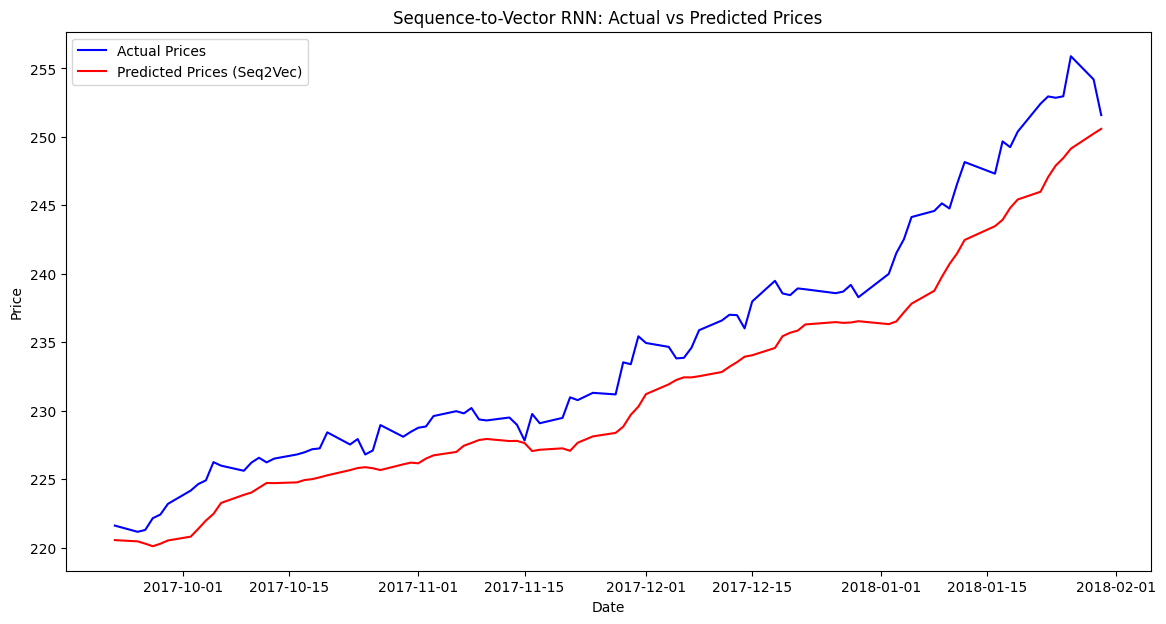

In [21]:
# Plot results for Sequence-to-Vector RNN
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_seq2vec):], y_test_seq2vec, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_pred_seq2vec):], y_pred_seq2vec, label='Predicted Prices (Seq2Vec)', color='red')
plt.title('Sequence-to-Vector RNN: Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

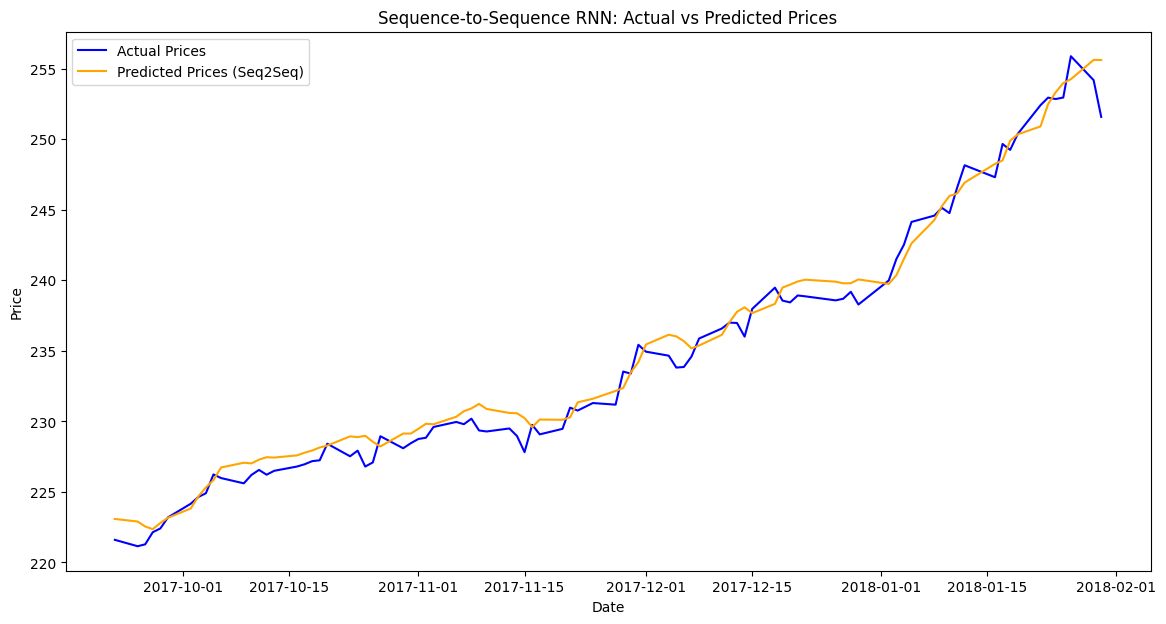

In [23]:
# Plot results for Sequence-to-Sequence RNN
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test_seq2seq):], y_test_seq2seq, label='Actual Prices', color='blue')
plt.plot(data.index[-len(y_pred_seq2seq):], y_pred_seq2seq, label='Predicted Prices (Seq2Seq)', color='orange')
plt.title('Sequence-to-Sequence RNN: Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()